In [2]:
df = pd.read_csv('modeling_round2.csv')
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df_train, df_test = train_test_split(df, test_size=0.4, random_state = 12)
X_train = df_train.loc[:, ~(df_train.columns).isin(['pitch_type'])]
Y_train = df_train['pitch_type']
X_test = df_test.loc[:, ~(df_test.columns).isin(['pitch_type'])]
Y_test = df_test['pitch_type']

In [4]:
def get_metrics(model, dataframe):
    x = dataframe.loc[:, ~(df_train.columns).isin(['pitch_type'])]
    y = dataframe['pitch_type']
    y_pred = cross_val_predict(model, x, y, cv = 3)
    accuracy = accuracy_score(y, y_pred)
    macro = f1_score(y, y_pred, average='macro')
    micro = f1_score(y, y_pred, average='micro')
    weighted = f1_score(y, y_pred, average='weighted')
    print(model)
    print('Accuracy:', accuracy)
    print('F1 Macro:', macro)
    print('F1 Micro:', micro)
    print('F1 Weighted:', weighted)
    print(classification_report(y, y_pred))

In [5]:
# Chose only the best 2 due to computational issues
rfc = RandomForestClassifier(random_state=12)
ridge = RidgeClassifier(random_state=12)

In [6]:
get_metrics(rfc, df_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)
Accuracy: 0.458575292386
F1 Macro: 0.386079289115
F1 Micro: 0.458575292386
F1 Weighted: 0.44327055078
             precision    recall  f1-score   support

         CH       0.27      0.23      0.25     43569
         CU       0.29      0.24      0.26     33759
         EP       0.00      0.00      0.00        84
         FA       0.51      0.65      0.57    143423
         FC       0.41      0.34      0.37     24964
         FS       0.35      0.21      0.26      6297
         FT       0.43      0.39      0.41     48718
         IN       0.96      0.69      0.80      2417
         KC  

In [7]:
get_metrics(ridge, df_train)

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=12, solver='auto',
        tol=0.001)
Accuracy: 0.482914997081
F1 Macro: 0.326115843143
F1 Micro: 0.482914997081
F1 Weighted: 0.421527468365
             precision    recall  f1-score   support

         CH       0.34      0.06      0.10     43569
         CU       0.40      0.07      0.12     33759
         EP       0.00      0.00      0.00        84
         FA       0.49      0.79      0.60    143423
         FC       0.48      0.31      0.38     24964
         FS       0.38      0.06      0.11      6297
         FT       0.43      0.42      0.42     48718
         IN       1.00      0.70      0.82      2417
         KC       0.48      0.08      0.13      5123
         KN       0.80      1.00      0.89      2666
         PO       0.00      0.00      0.00       539
         SC       0.31      0.05      0.09        73
         SI       0.52      0.84     

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


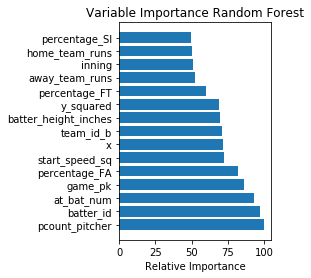

In [8]:
rfc.fit(X_train, Y_train)
feature_importance = rfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:15], feature_importance[sorted_idx[0:15]], align='center')
plt.yticks(pos[0:15], X_train.columns[sorted_idx[0:15]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance Random Forest')
plt.show()

Very slight improvements compared to the previous modeling round.